In [134]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
DATA_DIR = u'D:/Data/地方政府领导/'

In [146]:
files = [f for f in os.listdir(DATA_DIR)]

In [162]:
dic = {u'职务': [], u'姓名': [], u'出生年份': [], u'ID': []}
for f in files:
    person_id, duty, name = f[:-4].split('_')
    fname = '%s/%s'%(DATA_DIR, f)
    with open(fname, 'r') as fp:
        content = fp.read()
    if content.find('月出生') != -1:
        pos = content.find('月出生')
    elif content.find('月生') != -1:
        pos = content.find('月生')
    elif content.find('生于') != -1:
        pos = content.find('月，')
    else:
        pos = -1
    if pos == -1:
        print person_id, duty, name
    else:
        content = content[:pos]
        pos2 = content.find('19')
        year = content[pos2: pos2+4]
        if year == '':
            print person_id, duty, name
        else:
            dic[u'ID'].append(person_id)
            dic[u'职务'].append(duty)
            dic[u'姓名'].append(name)
            dic[u'出生年份'].append(int(year))

11742 新疆维吾尔自治区阿勒泰地委书记 张岩
12247 黑龙江省鸡西市委书记 张常荣
12952 内蒙古自治区党委常委、内蒙古军区司令员 冷杰松
14895 西藏自治区阿里地委书记 朱中奎
14898 新疆维吾尔自治区党委常委、新疆军区政委 李伟
15534 辽宁省人大常委会副主任，葫芦岛市委书记 孙轶
15553 江西省萍乡市市长 李江河
15747 西藏自治区那曲市市长 敖刘全
15824 重庆市大渡口区委书记 王俊
15976 河南省三门峡市委书记 刘南昌
16235 香港特别行政区立法会主席 梁君彦
16259 新疆维吾尔自治区喀什地委书记 李宁平
16406 西藏自治区阿里地区行署专员 彭措
16773 内蒙古自治区巴彦淖尔市委书记 常志刚
16816 香港特别行政区行政长官 林郑月娥
18376 市委书记 帕巴拉·格列朗杰
18590 新疆维吾尔自治区阿克苏地区行署专员 尼牙孜·阿西木
18618 上海市委常委、上海警备区政委 凌希
18619 湖北省委常委、省军区司令员 马涛
18620 安徽省委常委、省军区司令员 杨征
18623 甘肃省委常委、省军区政委 蒲永能
18626  杨笑祥
18628 广东省委常委、省军区司令员 张利明
18632 湖南省委常委、省军区政委 冯毅
18633 四川省委常委、省军区司令员 姜永申
18648 河南省委常委、省军区政委 胡永生
18660 青海省委常委、省军区司令员 曲新勇
18662 宁夏回族自治区党委常委、宁夏军区政委 潘武俊
18665 重庆市南岸区区长 陈一清
18759 云南省委常委、省军区政委 余琨
18769 重庆市綦江区委书记 袁勤华
18818 江苏省徐州市市长 庄兆林
18855 宣城市委书记 陶方启
18861 山东省日照市市长 李永红
18866 福建省平潭综合实验区党工委书记 陈善光
18890 浙江省委常委、宣传部部长 朱国贤
18915 天津市委常委、市警备区政委 李军
18916 江西省委常委、省军区司令员 吴亚非
18925 浙江省委常委、省军区司令员 冯文平
18930 吉林省委常委、省军区司令员 刘维
18934 重庆市永川区区长 张果
18935 山西省委常委、省军区司令员 韩强
5017 西藏自治区那曲市委书记 松吉扎西
7926 湖南省娄底市市长 杨懿文


In [163]:
df = pd.DataFrame(dic)

In [164]:
df.head()

,ID,出生年份,姓名,职务
0,10056,1969,高建军,河南省开封市市长
1,10220,1963,贠建民,甘肃省政协副主席，庆阳市委书记
2,10950,1966,赵凌云,甘肃省甘南藏族自治州州长
3,10969,1968,王为人,上海市长宁区委书记
4,11002,1961,杨斌,北京市副市长


In [165]:
count = df.groupby(u'出生年份').count()['ID']

In [166]:
count

出生年份
1940      1
1952      1
1953      3
1954      6
1955      9
1956     20
1957     15
1958     22
1959     33
1960     62
1961     84
1962    205
1963    275
1964    171
1965    142
1966     90
1967     72
1968     82
1969     54
1970     40
1971     36
1972     20
1973     10
1974      7
1975      3
1976      2
1980      1
Name: ID, dtype: int64

<BarContainer object of 27 artists>

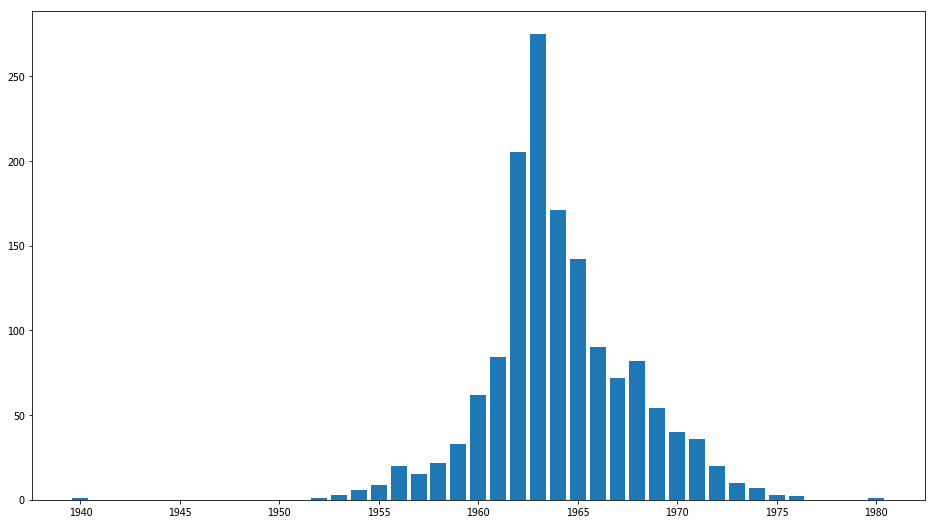

In [169]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(count.index, count.values)